In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
retail = pd.read_excel('retail.xlsx')

In [4]:
retail = retail[:10000]

In [5]:
retail['Hour'] = retail['InvoiceDate'].dt.strftime('%H').astype(int)

In [6]:
retail['Hour'].describe()

count    10000.000000
mean        13.081000
std          2.310016
min          7.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         19.000000
Name: Hour, dtype: float64

array([[<AxesSubplot:title={'center':'Hour'}>]], dtype=object)

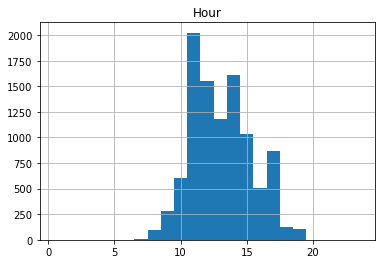

In [7]:
retail['Quantity'] = retail['Quantity'].astype(int)
retail.hist(column = 'Hour', bins = np.arange(0,24) + 0.5)

In [8]:
combined_retail = retail.groupby(['InvoiceNo']).mean()

array([[<AxesSubplot:title={'center':'Quantity'}>]], dtype=object)

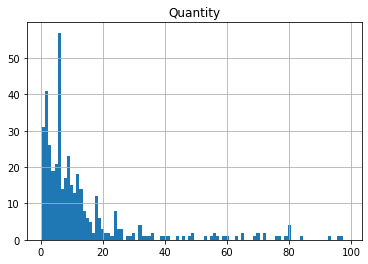

In [9]:
combined_retail.hist(column = 'Quantity', bins = np.arange(0,99) + 0.5)

In [10]:
combined_retail.head()

,Quantity,UnitPrice,CustomerID,Hour
InvoiceNo,,,,
536365,5.714286,3.910000,17850.0,8.0
536366,6.000000,1.850000,17850.0,8.0
536367,6.916667,4.853333,13047.0,8.0
536368,3.750000,4.775000,13047.0,8.0
536369,3.000000,5.950000,13047.0,8.0


In [11]:
combined_retail.describe()

,Quantity,UnitPrice,CustomerID,Hour
count,512.000000,512.000000,444.000000,512.000000
mean,4.416784,3.964822,15556.576577,13.046875
std,435.319911,13.233141,1780.641407,2.516044
min,-9360.000000,0.000000,12395.000000,7.000000
25%,2.045238,1.849700,14073.500000,11.000000
50%,6.190909,2.850000,15550.000000,13.000000
75%,13.660294,4.219100,17353.750000,15.000000
max,2140.000000,295.000000,18239.000000,19.000000


In [12]:
retail.describe()

,Quantity,UnitPrice,CustomerID,Hour
count,10000.000000,10000.000000,7709.000000,10000.000000
mean,7.828600,3.837412,15615.462576,13.081000
std,104.322417,14.310148,1756.540802,2.310016
min,-9360.000000,0.000000,12395.000000,7.000000
25%,1.000000,1.250000,14388.000000,11.000000
50%,2.000000,2.510000,15605.000000,13.000000
75%,8.000000,4.210000,17228.000000,15.000000
max,2880.000000,887.520000,18239.000000,19.000000


In [13]:
total_retail = retail.groupby(['StockCode']).sum()

In [14]:
# Method #1: MLxtend
basket = (retail.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [16]:
basket_sets = basket.applymap(encode_units)
#basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [17]:
basket_sets.sum()

Description
 4 PURPLE FLOCK DINNER CANDLES        2
 OVAL WALL MIRROR DIAMANTE            1
 SET 2 TEA TOWELS I LOVE LONDON      17
10 COLOUR SPACEBOY PEN               13
12 COLOURED PARTY BALLOONS            3
                                     ..
ZINC FOLKART SLEIGH BELLS             1
ZINC HEART LATTICE T-LIGHT HOLDER     2
ZINC METAL HEART DECORATION          13
ZINC WILLIE WINKIE  CANDLE STICK      8
amazon                                2
Length: 1981, dtype: int64

In [18]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True, max_len=3, low_memory = True)

In [19]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

In [20]:
rules.sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
952,"(SAVE THE PLANET MUG, WOODEN FRAME ANTIQUE WHI...",(RETRO COFFEE MUGS ASSORTED),0.029787,0.057447,0.029787,1.0,17.407407,0.028076,inf
1225,"(VINTAGE BILLBOARD LOVE/HATE MUG, WHITE HANGIN...",(VINTAGE BILLBOARD DRINK ME MUG),0.034043,0.046809,0.034043,1.0,21.363636,0.032449,inf
1216,"(SET 7 BABUSHKA NESTING BOXES, WOOD S/3 CABINE...",(WOODEN FRAME ANTIQUE WHITE ),0.027660,0.061702,0.027660,1.0,16.206897,0.025953,inf
343,"(RETRO COFFEE MUGS ASSORTED, GLASS STAR FROSTE...",(RED WOOLLY HOTTIE WHITE HEART.),0.031915,0.089362,0.031915,1.0,11.190476,0.029063,inf
1092,"(SAVE THE PLANET MUG, WOOD S/3 CABINET ANT WHI...",(VINTAGE BILLBOARD DRINK ME MUG),0.025532,0.046809,0.025532,1.0,21.363636,0.024337,inf
...,...,...,...,...,...,...,...,...,...
1230,(WHITE METAL LANTERN),"(VINTAGE BILLBOARD DRINK ME MUG, VINTAGE BILLB...",0.042553,0.036170,0.034043,0.8,22.117647,0.032503,4.819149
784,(SAVE THE PLANET MUG),"(RED WOOLLY HOTTIE WHITE HEART., RETRO COFFEE ...",0.042553,0.042553,0.034043,0.8,18.800000,0.032232,4.787234
173,"(SET 7 BABUSHKA NESTING BOXES, CREAM CUPID HEA...",(SAVE THE PLANET MUG),0.031915,0.042553,0.025532,0.8,18.800000,0.024174,4.787234
1343,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG...",(WOOD S/3 CABINET ANT WHITE FINISH),0.042553,0.044681,0.034043,0.8,17.904762,0.032141,4.776596


In [20]:
frequent_itemsets

,support,itemsets
0,0.036170,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.027660,(10 COLOUR SPACEBOY PEN)
2,0.021277,(12 PENCIL SMALL TUBE WOODLAND)
3,0.034043,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.029787,(12 PENCILS SMALL TUBE SKULL)
...,...,...
1040,0.031915,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE META..."
1041,0.034043,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ..."
1042,0.031915,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C..."
1043,0.034043,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA..."


In [21]:
# Method #2 Apyori

In [21]:
basket = (retail.groupby(['InvoiceNo', 'Description']).first())

In [22]:
combinations = basket.index.to_numpy()

In [23]:
elemDict = {}
for elem in combinations:
    if elem[0] in elemDict and type(elem[1]) == str:
        elemDict[elem[0]].append(elem[1])
    elif type(elem[1]) == str:
        elemDict[elem[0]] = [elem[1]]

In [24]:
productsBought = list(elemDict.values())

In [25]:
from apyori import apriori

In [ ]:
results = list(apriori(productsBought, min_support = 0.02, min_confidence = 0.8))

In [ ]:
results = pd.DataFrame(results)

In [ ]:
results

In [ ]:
results['ordered_statistics'][0]